## Bribe and Voting report for bveCVX round 1st September 2022

---

### Snapshot Link

[Snapshot Voting Round](https://vote.convexfinance.com/#/proposal/bafkreiepapq2rgoh4udx273ygz5lbgvg6ysnwva6kvz2rinj26lat7ilsm)

### Llama.Airforce:

[Llama Airforce Link](https://llama.airforce/#/bribes/rounds/votium/cvx-crv/26)



## Voting Results

In [1]:
from decimal import Decimal

import pandas as pd
from IPython.core.display_functions import display

from notebooks.cvx_bribes.bvecvx_data import VOTING_DATA_R26
from notebooks.cvx_bribes.bvecvx_data import get_rows_from_data

TABLE_COLUMNS = ["Total CVX $", "Total BADGER $", "Amount CVX bought", "Amount Badger bought",
                 "$/vlCVX total", "$/vlCVX pure bribes"]

table_rows = get_rows_from_data(VOTING_DATA_R26)
dataframe = pd.DataFrame(data=table_rows, columns=TABLE_COLUMNS)
display(dataframe)
llama_vlCVX = Decimal(0.06436)
badger_vlCVX = VOTING_DATA_R26['$/vlCVX without badgerwbtc']

print(f"\n")
print(f">>> Llama.Airforce $/vlCVX : ${round(llama_vlCVX, 4)}/vlCVX")
print(f">>> Badger $/vlCVX : ${badger_vlCVX}/vlCVX")
print(f">>> Difference is {round(abs(llama_vlCVX - badger_vlCVX) / ((llama_vlCVX + badger_vlCVX) / 2) * 100, 3)}%")
print(f">>> Total earned bribes for round is: ${VOTING_DATA_R26['total_cvx_sold_in_$'] + VOTING_DATA_R26['total_badger_sold_in_$']}")

,Total CVX $,Total BADGER $,Amount CVX bought,Amount Badger bought,$/vlCVX total,$/vlCVX pure bribes
0,106407.8714936843484785899000,40399.95678454424689806168000,19668.73779920228252839,9266.045134069781398638,0.05767415878660661498545298424,0.06370720651176721251097108908




>>> Llama.Airforce $/vlCVX : $0.0644/vlCVX
>>> Badger $/vlCVX : $0.06370720651176721251097108908/vlCVX
>>> Difference is 1.019%
>>> Total earned bribes for round is: $146807.8282782285953766515800


## Bribes harvesting info

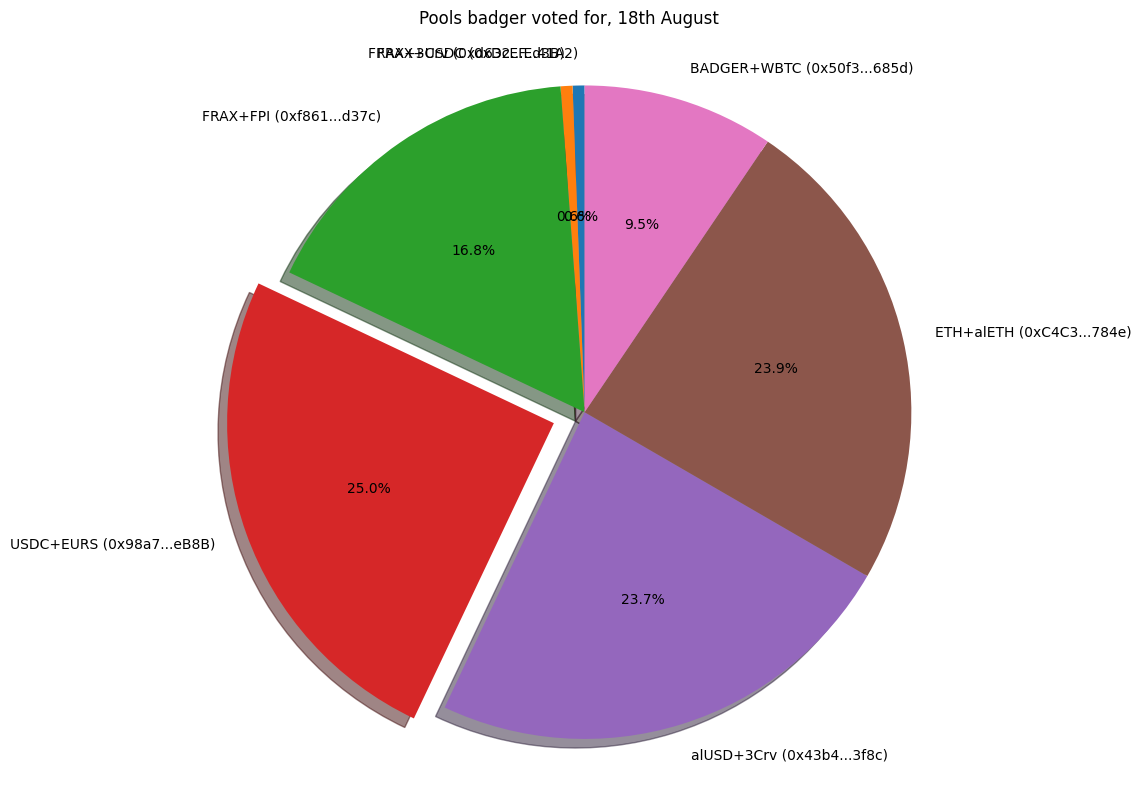

In [2]:
from notebooks.cvx_bribes.bvecvx_data import BRIBES_HARVESTED_DATA_R26
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10, 10)

labels = tuple(BRIBES_HARVESTED_DATA_R26.keys())
pools_bribes = list(BRIBES_HARVESTED_DATA_R26.values())
biggest_bribe_by_vote = max(pools_bribes)
biggest_bribe_ix = pools_bribes.index(biggest_bribe_by_vote)
explode = []
# Explode biggest bribe by value
for bribe in pools_bribes:
    explode.append(0.1) if pools_bribes.index(bribe) == biggest_bribe_ix else explode.append(0)

fig1, ax1 = plt.subplots()
ax1.pie(pools_bribes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Pools badger voted for, 18th August")
plt.show()

## Overall $/vlCVX data

Display performance of Badger vlCVX over different voting rounds

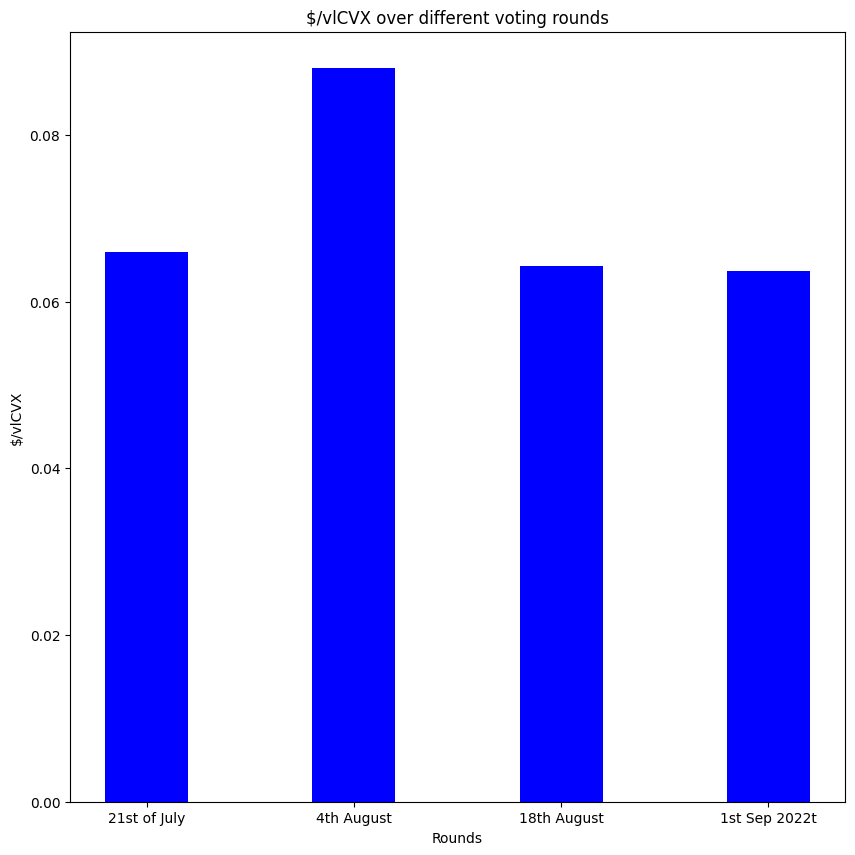

In [3]:
from notebooks.cvx_bribes.bvecvx_data import VOTING_DATASETS

import matplotlib.pyplot as plt

rounds = [dataset['round'] for dataset in VOTING_DATASETS]
vlcvxs = [float(dataset['$/vlCVX without badgerwbtc']) for dataset in VOTING_DATASETS]

fig = plt.figure(figsize=(10, 10))

# creating the bar plot
plt.bar(rounds, vlcvxs, color='blue', width=0.4)

plt.xlabel("Rounds")
plt.ylabel("$/vlCVX")
plt.title("$/vlCVX over different voting rounds")
plt.show()

## Overall bribes harvested


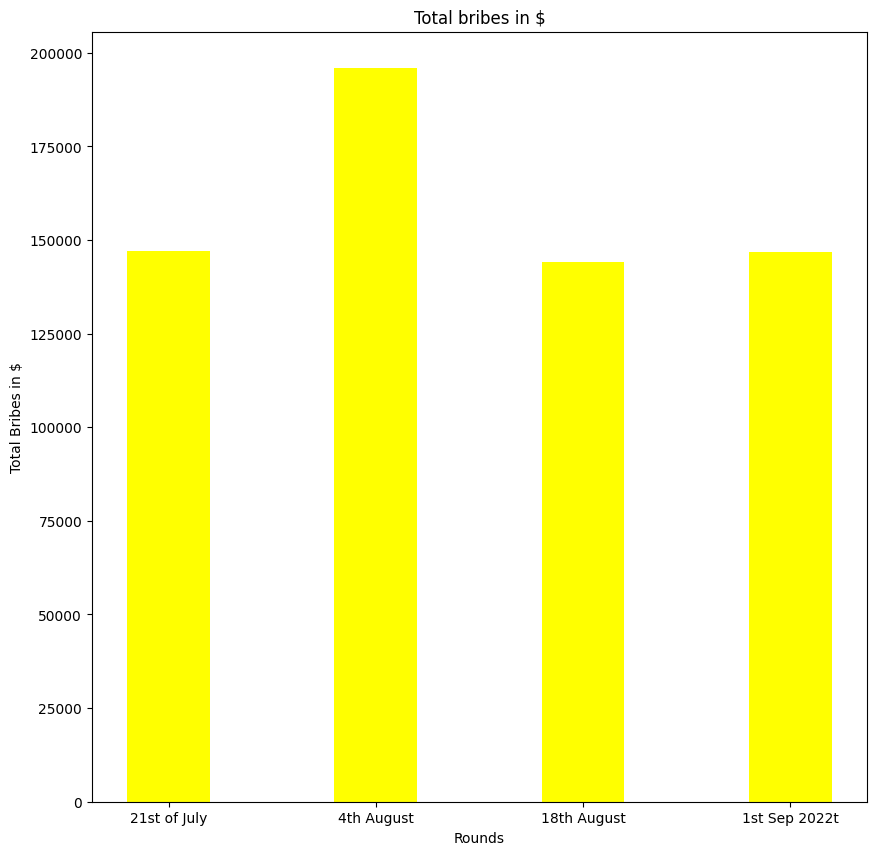

In [4]:
from notebooks.cvx_bribes.bvecvx_data import VOTING_DATASETS

import matplotlib.pyplot as plt

rounds = [dataset['round'] for dataset in VOTING_DATASETS]
total_bribes = [float(dataset['total_cvx_sold_in_$'] + dataset['total_badger_sold_in_$']) for dataset in VOTING_DATASETS]

fig_total = plt.figure(figsize=(10, 10))

# creating the bar plot
plt.bar(rounds, total_bribes, color='yellow', width=0.4)

plt.xlabel("Rounds")
plt.ylabel("Total Bribes in $")
plt.title("Total bribes in $")
plt.show()